# Projeto 3

Neste projeto, foi analisado a popularidade de um filme baseado nos atores que estão nele.

In [63]:
import pandas as pd
import statsmodels.api as sm

a = 400

In [64]:
data1 = pd.read_csv('tmdb_5000_credits.csv')
data2 = pd.read_csv('tmdb_5000_movies.csv')

In [65]:
data_credits = data1.set_index('title')
data_movie = data2.set_index('title')

Nesta parte foi dado o joint nos 2 dataframes importados para melhor manuseamento e depois foi feita a filtragem dos dados indesejaveis para melhor análise, gerando o df, que sera usado para nossa regressão.

In [66]:
data_credits.head(3)

,movie_id,cast,crew
title,,,
Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [67]:
data_movie.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,
Avatar,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
Pirates of the Caribbean: At World's End,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
Spectre,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466


In [6]:
data = data_credits.join(data_movie, how="inner")

In [62]:
data.head(3)

,movie_id,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
#Horror,301325,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de...",1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",http://www.hashtaghorror.com/,301325,[],de,#Horror,...,"[{""name"": ""AST Studios"", ""id"": 75277}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-11-20,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Death is trending.,3.3,52
(500) Days of Summer,19913,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de...",7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,(500) Days of Summer,...,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-07-17,60722734,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It was almost like falling in love.,7.2,2904
10 Cloverfield Lane,333371,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{""credit_id"": ""57627624c3a3680682000872"", ""de...",15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,10 Cloverfield Lane,...,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-10,108286421,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Monsters come in many forms.,6.8,2468


Filtragem de Dados


In [68]:
df = data[['cast', 'popularity', 'vote_average']]
df.sort_values(by="popularity", ascending=False).head(5)

,cast,popularity,vote_average
title,,,
Minions,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...",875.581305,6.4
Interstellar,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...",724.247784,8.1
Deadpool,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...",514.569956,7.4
Guardians of the Galaxy,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...",481.098624,7.9
Mad Max: Fury Road,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...",434.278564,7.2


Para podermos saber quais atores fizeram quais filmes, pegamos o dicionario da coluna 'cast' e o transformamos em um dataframe. Deste dataframe, pôde se tirar o número de filmes que cada ator fez.

In [69]:
cast_total = []

for l in df.iterrows():
    lista_dic = eval(l[1]["cast"])
    for dic in lista_dic:
        dic["movie"] = l[0]
    cast_total.extend(lista_dic)


In [70]:
d = pd.DataFrame.from_records(cast_total)
dados = d[['character', 'movie', 'name']]

In [71]:
dados.head(6)

,character,movie,name
0,Alex's 12-Step Friend,#Horror,Taryn Manning
1,Sam's Mom,#Horror,Natasha Lyonne
2,Alex Cox,#Horror,Chloë Sevigny
3,Mr. Cox,#Horror,Balthazar Getty
4,Dr. White,#Horror,Timothy Hutton
5,Lisa,#Horror,Lydia Hearst


In [73]:
x = dados.name.value_counts()
x.head(15)

Samuel L. Jackson    67
Robert De Niro       57
Bruce Willis         51
Matt Damon           48
Morgan Freeman       46
Steve Buscemi        43
Liam Neeson          41
Johnny Depp          40
Owen Wilson          40
Alec Baldwin         39
Nicolas Cage         39
John Goodman         39
Jim Broadbent        38
Willem Dafoe         38
Brad Pitt            38
Name: name, dtype: int64

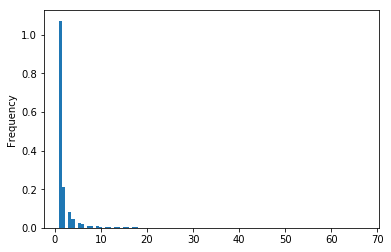

In [37]:
x.plot.hist(density=True, bins=100)

Podemos ver neste histograma que o numero de filmes por ator é bem desproporcional

Com a tabela de atores por filmes montada, foi inserida no dataframe principal uma coluna por ator (achamos relevante pegar atores somente com 18 filmes feitos ou mais para que ele tivesse alguma relevância no filme) que tem em suas linhas 0 para os filems que não participou e 1 para os que sim.

In [13]:
atores = list(dados.name.value_counts().head(a).index)

In [75]:
for i in atores:
    df[i] = 0
    
df

for i in dados.itertuples():
    if i.name in df.columns:
        
        df.loc[i.movie, i.name] = 1

In [76]:
df

,cast,popularity,vote_average,Samuel L. Jackson,Robert De Niro,Bruce Willis,Matt Damon,Morgan Freeman,Steve Buscemi,Liam Neeson,...,Michael Rapaport,Bob Gunton,Thomas Jane,Joe Chrest,Djimon Hounsou,Anne Fletcher,Matthew Lillard,Tom Sizemore,Glenn Morshower,Barry Pepper
title,,,,,,,,,,,,,,,,,,,,,
#Horror,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...",2.815228,3.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
(500) Days of Summer,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...",45.610993,7.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Cloverfield Lane,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...",53.698683,6.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Days in a Madhouse,"[{""cast_id"": 2, ""character"": ""Nellie Bly"", ""cr...",0.489271,4.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,"[{""cast_id"": 2, ""character"": ""Patrick Verona"",...",54.550275,7.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102 Dalmatians,"[{""cast_id"": 1, ""character"": ""Cruella de Vil"",...",9.895061,5.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10th & Wolf,"[{""cast_id"": 1, ""character"": ""Tommy"", ""credit_...",3.942464,6.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11:14,"[{""cast_id"": 10, ""character"": ""Jack"", ""credit_...",15.048067,6.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 Angry Men,"[{""cast_id"": 29, ""character"": ""Juror 8"", ""cred...",59.259204,8.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dados.to_excel("atuacoes.xlsx")
dados.name.value_counts().to_excel("contagem.xlsx")
df.to_excel('dataframe uhul.xlsx')

Para que a regressão fosse feita, foi separada a entreda e a saída, filtrando o df para que seja analisado somente oque queriamos que são os atores.    

In [20]:
colunas = list(df.columns)
indesejaveis = ['cast', 'popularity', 'vote_average']

for i in indesejaveis:
    colunas.remove(i)

In [21]:
entrada = df.loc[:, colunas]

In [22]:
out = df['popularity']
out.head(10)

title
#Horror                        2.815228
(500) Days of Summer          45.610993
10 Cloverfield Lane           53.698683
10 Days in a Madhouse          0.489271
10 Things I Hate About You    54.550275
102 Dalmatians                 9.895061
10th & Wolf                    3.942464
11:14                         15.048067
12 Angry Men                  59.259204
12 Rounds                     15.661350
Name: popularity, dtype: float64

A regressão foi feita usando a funsão OLS do statsmodel

In [38]:
def regress(X,Y):
    model = sm.OLS(Y,X)
    results = model.fit()
    return results

In [39]:
var = regress(entrada, out)

In [40]:
var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     11.12
Date:                Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                        08:06:56   Log-Likelihood:                -22687.
No. Observations:                4809   AIC:                         4.617e+04
Df Residuals:                    4409   BIC:                         4.877e+04
Df Model:                         400                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Samuel L. Jackson          0.3766      3.840      0.098      0.922      -7.152       7.905
Robert De Niro            10.6781      4.061      2.630      0.009       2.717      18.639
Bruce Willis              17.7898      4.296      4.141      0.000       9.368      26.211
Matt Damon                21.9940      4.580      4.802      0.000      13.015      30.973
Morgan Freeman            20.4772      4.624      4.428      0.000      11.411      29.543
Steve Buscemi              3.2724      4.925      0.664      0.506      -6.384      12.929
Liam Neeson               19.7947      4.795      4.128      0.000      10.394      29.195
Johnny Depp               19.0405      4.969      3.832      0.000       9.299      28.782
Owen Wilson               -1.2886      5.234     -0.246      0.806     -11.549       8.972
Alec Baldwin               4.7414      4.875      0.973      0.331      -4.816      14.299
Nicolas Cage               7.2204      4.866      1.484      0.138      -2.319      16.760
John Goodman              10.2960      4.891      2.105      0.035       0.707      19.885
Jim Broadbent             -0.1574      5.041     -0.031      0.975     -10.039       9.725
Willem Dafoe               0.4988      5.082      0.098      0.922      -9.465      10.462
Brad Pitt                 22.8500      5.099      4.481      0.000      12.854      32.846
Stanley Tucci             10.5878      5.129      2.064      0.039       0.532      20.644
Paul Giamatti              9.1083      5.005      1.820      0.069      -0.704      18.921
Will Ferrell              -7.7362      5.377     -1.439      0.150     -18.277       2.805
Susan Sarandon             0.2969      5.062      0.059      0.953      -9.627      10.221
Richard Jenkins           -3.9361      5.151     -0.764      0.445     -14.035       6.163
J.K. Simmons               8.7402      5.271      1.658      0.097      -1.594      19.075
Christopher Walken         3.5146      5.180      0.678      0.498      -6.641      13.671
Keith David                3.9244      5.115      0.767      0.443      -6.104      13.952
Bill Murray               11.1238      5.187      2.144      0.032       0.954      21.293
Bill Hader                11.6736      5.714      2.043      0.041       0.472      22.876
Paul Rudd                 -9.8371      5.569     -1.766      0.077     -20.755       1.081
Robin Williams             8.4111      5.208      1.615      0.106      -1.799      18.621
Justin Long               -4.8421      5.423     -0.893      0.372     -15.473       5.789
Anthony Hopkins           -6.6381      5.215     -1.273      0.203     -16.863       3.587
David Koechner           -11.6391      5.387     -2.160      0.031     -22.201      -1.077
Ben Kingsley              11.8146      5.152      2.293      0.022       1.714  

In [52]:
test = data_movie[['budget', 'popularity']]
test.sort_values(by='budget', ascending=False).head()

,budget,popularity
title,,
Pirates of the Caribbean: On Stranger Tides,380000000,135.413856
Pirates of the Caribbean: At World's End,300000000,139.082615
Avengers: Age of Ultron,280000000,134.279229
Superman Returns,270000000,57.925623
John Carter,260000000,43.926995


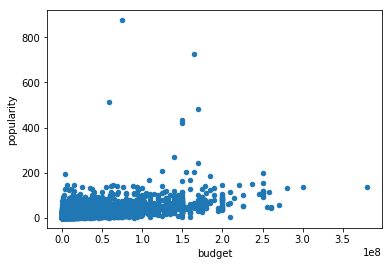

In [47]:
test.plot.scatter(x='budget', y='popularity')